<a href="https://colab.research.google.com/github/YuriGribauskasDenis/NetworkTopologies/blob/main/VGGFamilyTopologies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import keras
import keras.backend as BCKN
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense, Conv2D, Flatten
from keras.layers import MaxPooling2D
from keras.layers import ReLU, Softmax
from keras.layers import BatchNormalization as BN
from keras.utils.vis_utils import plot_model

**Alex Net**
It is from the same family as vgg but older. As we can see in articles the first convolution it performs is actoally '11 x 11'. So we consider this step as one that looses a lot of important information trying to destinguish details too big. And the number of layers is low. We consider it as a part of vgg topology family which we shall consider next

In [3]:
def ANet(shape, num_classes):

  def CR(model, features, kernal=1, stride=1, padd='same'):
    model = Conv2D(features, kernel_size=kernal, strides=stride, padding=padd) (model)
    model = ReLU() (model)
    return model

  def CRBNM(model, features, kernal=1, stride=1, padd='same'):
    model = CR(model, features, kernal, stride, padd)
    model = BN() (model)
    model = MaxPooling2D(3, strides=2)(model)
    return model

  first = Input(shape)
  model = CRBNM(first, 96, 11, 4)
  model = CRBNM(model, 256, 5)
  model = CR(model, 384, 3)
  model = CR(model, 384, 3)
  model = CRBNM(model, 256, 3)
  
  #tail
  model = Flatten()(model)
  model = Dense(4096)(model)
  model = ReLU() (model)
  model = Dense(4096)(model)
  model = ReLU() (model)
  model = Dense(num_classes) (model)
  last = Softmax() (model)
  final = Model(first, last)
  
  return final

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 56, 56, 96)        34944     
                                                                 
 re_lu (ReLU)                (None, 56, 56, 96)        0         
                                                                 
 batch_normalization (BatchN  (None, 56, 56, 96)       384       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 27, 27, 256)       614656

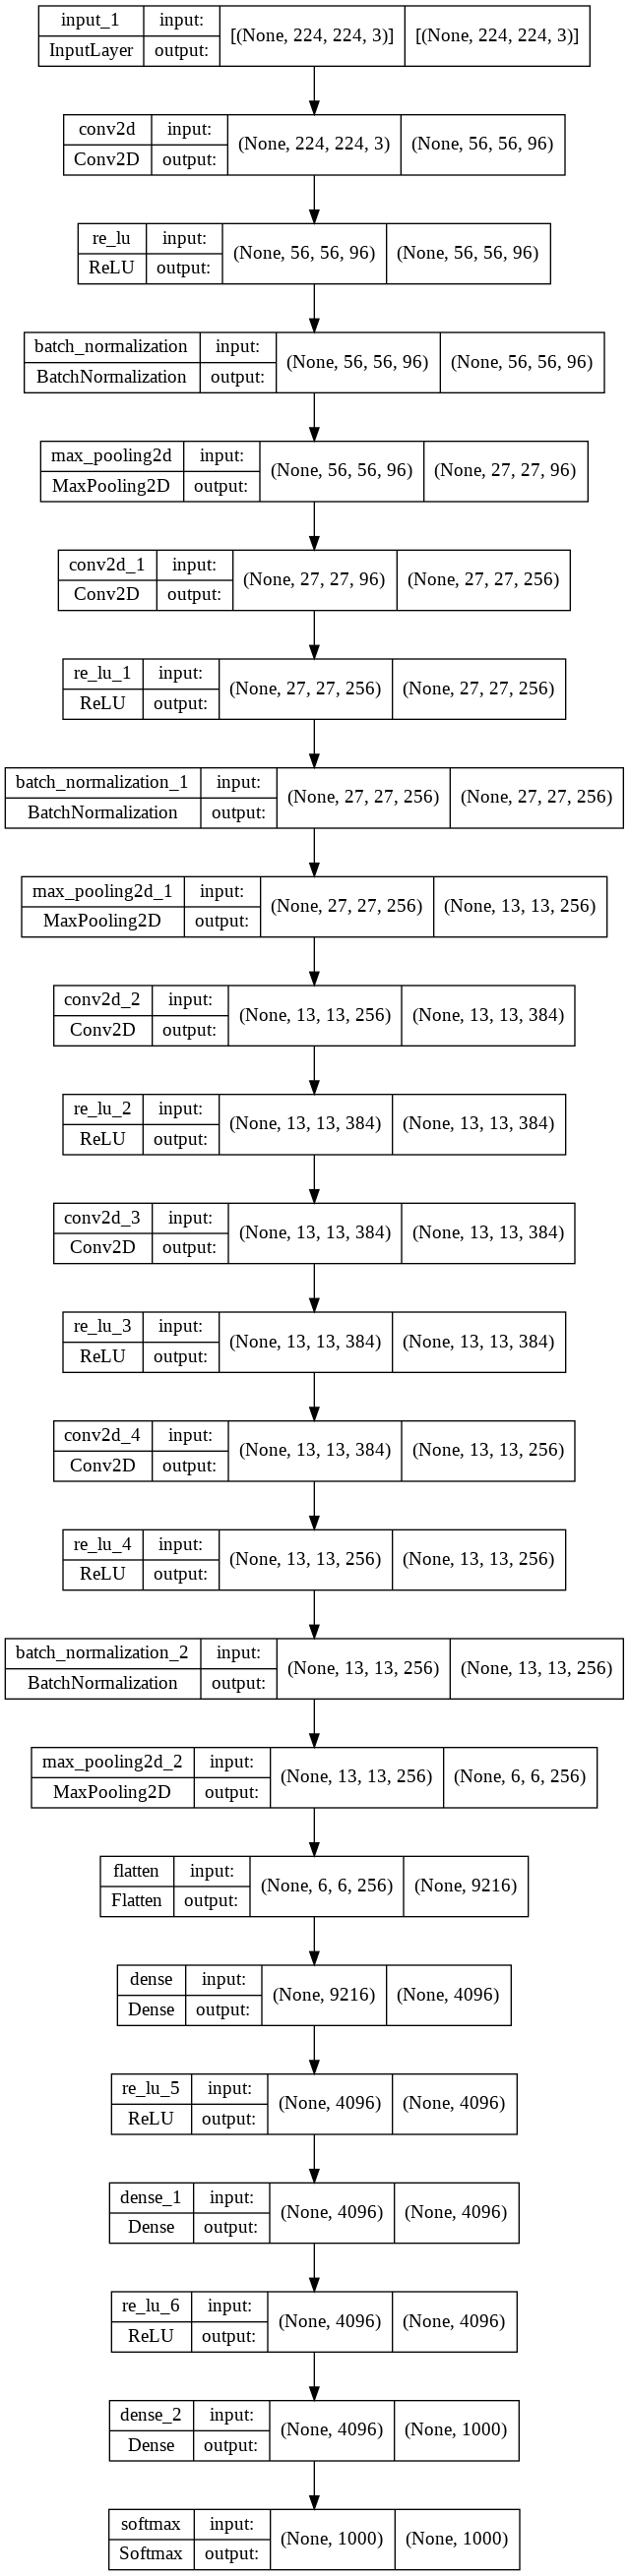

In [4]:
shape = (224, 224, 3)
num_classes = 1000
BCKN.clear_session()
model = ANet(shape, num_classes)
model.summary()
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

**VGG**

In [5]:
def VGG (shape, num_classes, arch_list = (1, 1, 2, 2, 2)):

  #the A-LNR and C options are not introduced but easiely can be implemented
  #both aproaches from this family (alex and vgg) use for regularization LNR
  #LRN stands for local response normalization - some technic from time far away
  #it involves riding a microra... or it is microraptor who is riding us...
  #long story short nowardays we are using batch normalization
  #and in any case in this example it will not come in hand

  first = Input(shape)

  #convolution relu block
  def CR (model, filters):
    model = Conv2D(filters, 3, padding='same') (model)
    model = ReLU() (model)
    return model

  sizes = 64, 128, 256, 512, 512
  #vgg full block
  #full stands for the fact that we did not divide for smaller five blocks
  def VGGFB (model):
    for s, a in zip(sizes, arch_list):
      for _ in range(a):
        model = CR(model, s)
      model = MaxPooling2D(2, strides=2, padding='same') (model)
    return model
  
  #main constructor
  model = VGGFB (first)

  #as it was said in the paper adding normalization
  #does not give any sizable advantage
  #so we basically did not
  #we did not add any normalization at all
  #even though adding normalization requires not that much code editing

  #tail
  model = Flatten()(model)
  model = Dense(4096)(model)
  model = ReLU() (model)
  model = Dense(4096)(model)
  model = ReLU() (model)
  model = Dense(num_classes) (model)
  last = Softmax() (model)
  final = Model(first, last)

  return final

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 re_lu (ReLU)                (None, 224, 224, 64)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 re_lu_1 (ReLU)              (None, 224, 224, 64)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                             

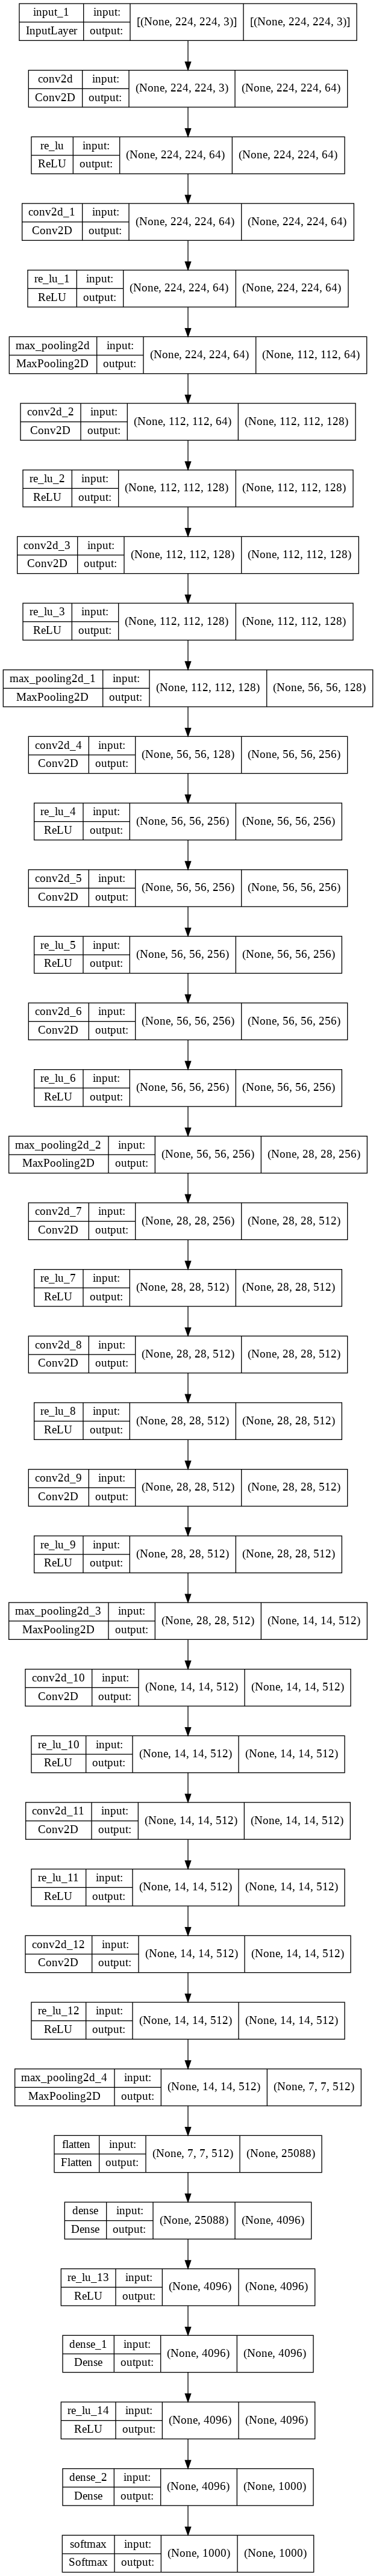

In [6]:
shape = (224, 224, 3)
num_classes = 1000
architecture = (2, 2, 3, 3, 3)
BCKN.clear_session()
model = VGG(shape, num_classes, architecture)
model.summary()
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)